# Table of Contents
 <p>

In [1]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from xgboost import XGBClassifier

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,matplotlib,sklearn

Ethen 2017-11-24 15:09:17 

CPython 3.5.2
IPython 6.2.1

numpy 1.13.3
pandas 0.20.3
matplotlib 2.1.0
sklearn 0.19.1


In [2]:
titanic = pd.read_csv('titanic_train.csv')

titanic["Age"] = titanic["Age"].fillna(titanic["Age"].dropna().median())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

titanic['Sex'] = titanic['Sex'].apply(lambda x : 1 if x == 'male' else 0)
titanic = pd.get_dummies(titanic, columns=['Embarked'])

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [3]:
data = titanic[features]
y = titanic['Survived']
clf = XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.05, subsample=0.85, 
                    colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100)
clf.fit(data, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
       colsample_bytree=0.85, gamma=0.1, learning_rate=0.05,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.85)

In [5]:
feature_type = 'categorical'
feature_grid = np.array([0, 1])
chunk_size = int(data.shape[0] / feature_grid.size)

feature = 'Sex'
i = 0
data_chunk = data[i:i + chunk_size]
data_chunk.shape

(445, 9)

In [8]:
data_chunk = data[i:i + chunk_size]
ice_data = np.repeat(data_chunk.values, repeats = feature_grid.size, axis = 0)
ice_data = pd.DataFrame(ice_data, columns = features)
ice_data[feature] = np.tile(feature_grid, data_chunk.shape[0])
ice_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3.0,0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,3.0,1,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
2,1.0,0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0
3,1.0,1,38.0,1.0,0.0,71.2833,1.0,0.0,0.0
4,3.0,0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0


In [44]:
from partial_dependence import PartialDependenceExplainer

pd_explainer = PartialDependenceExplainer(estimator = clf)
results = pd_explainer.fit(data, feature = 'Sex')
results.head()

,Sex_0,Sex_1
0,0.508245,0.094201
1,0.964509,0.486619
2,0.566726,0.179340
3,0.971298,0.537797
4,0.480374,0.141588


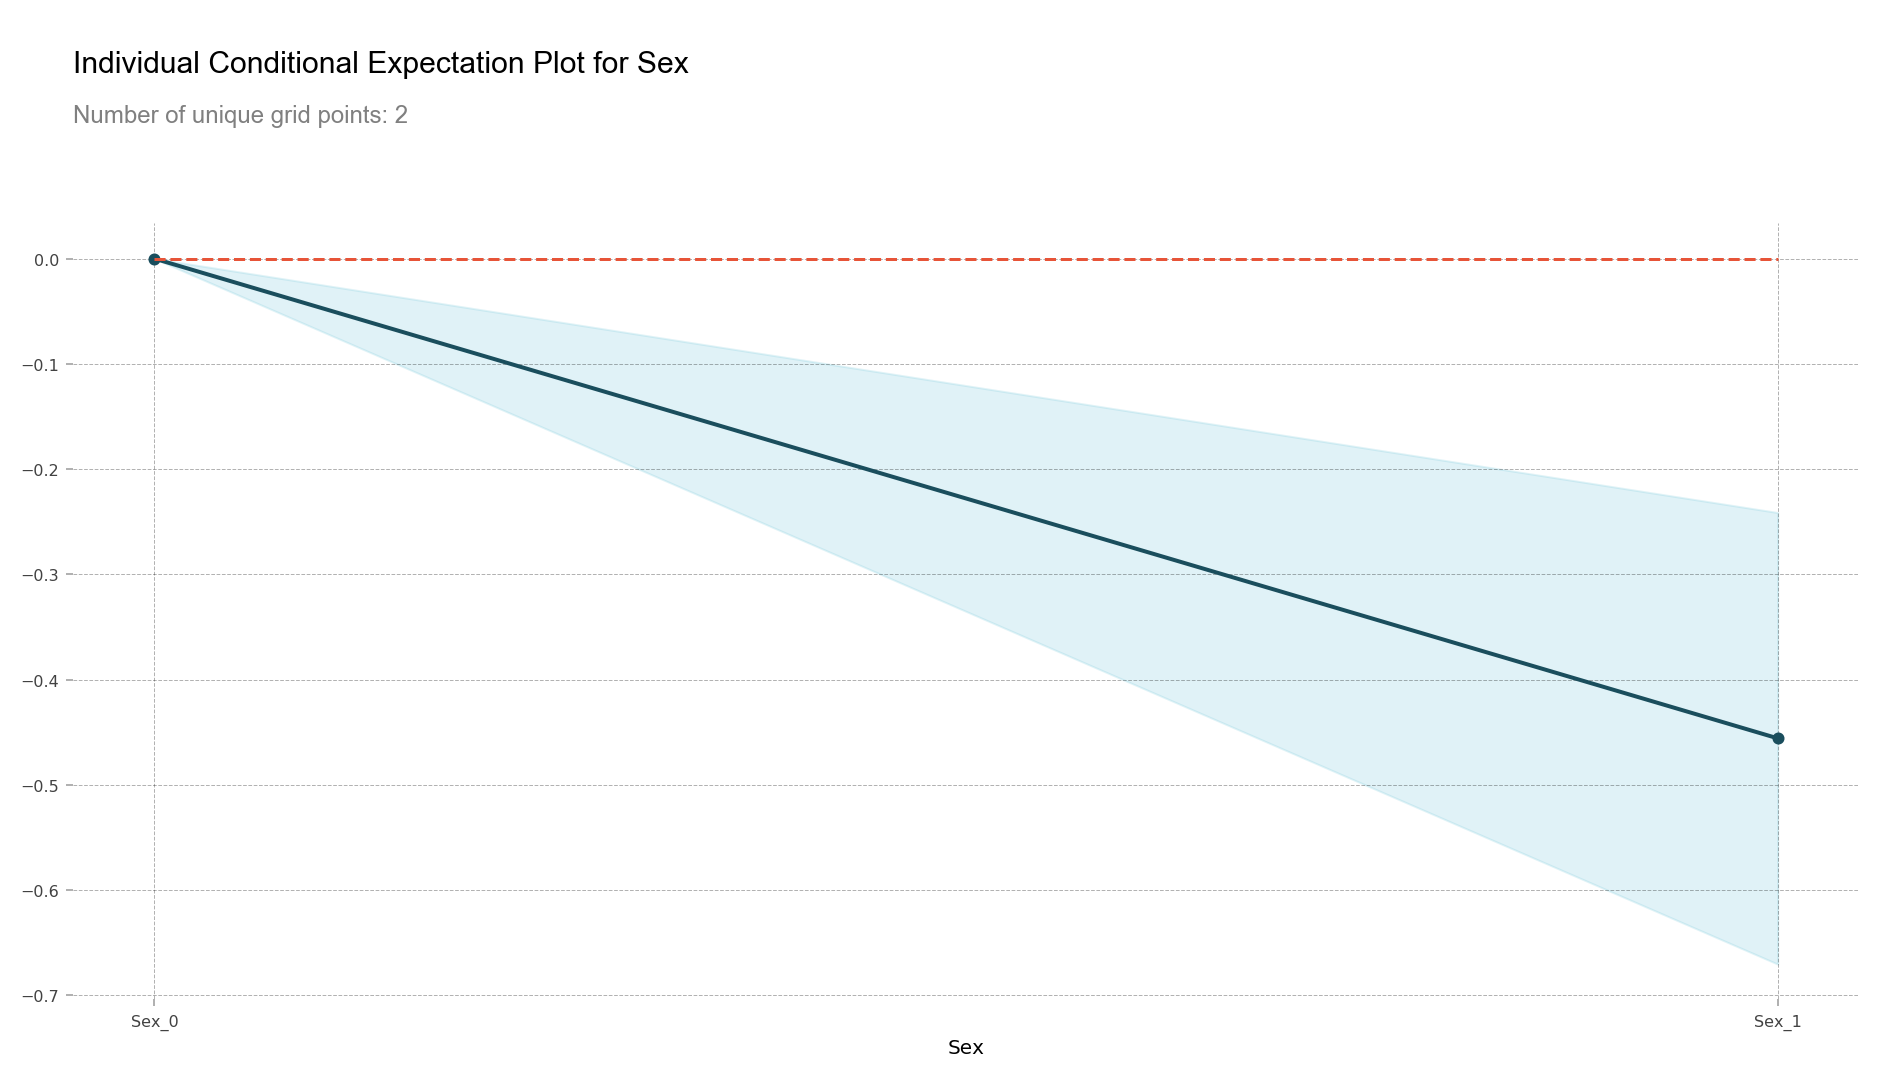

In [45]:
import matplotlib.pyplot as plt

pd_explainer.plot(results)

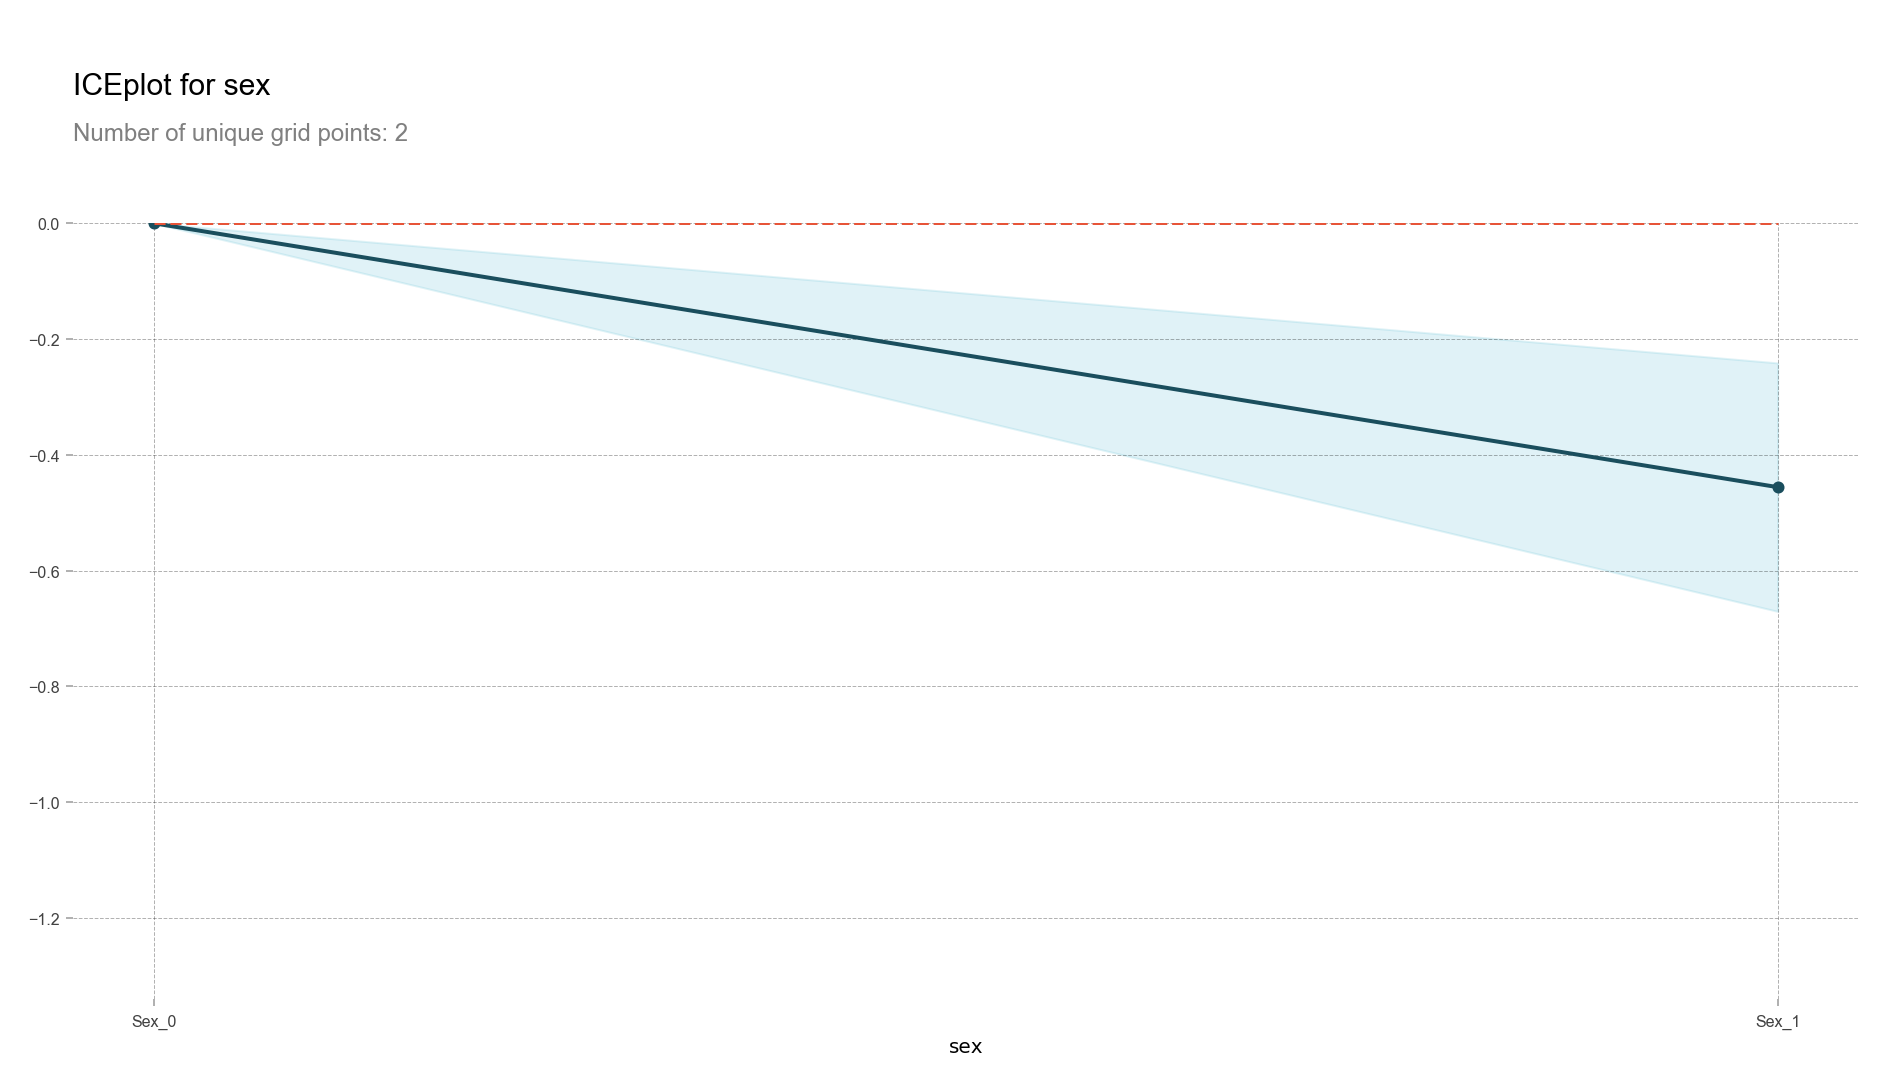

In [49]:
from pdpbox import pdp

pdp_sex = pdp.pdp_isolate(clf, titanic[features], 'Sex')
pdp.pdp_plot(pdp_sex, 'sex')

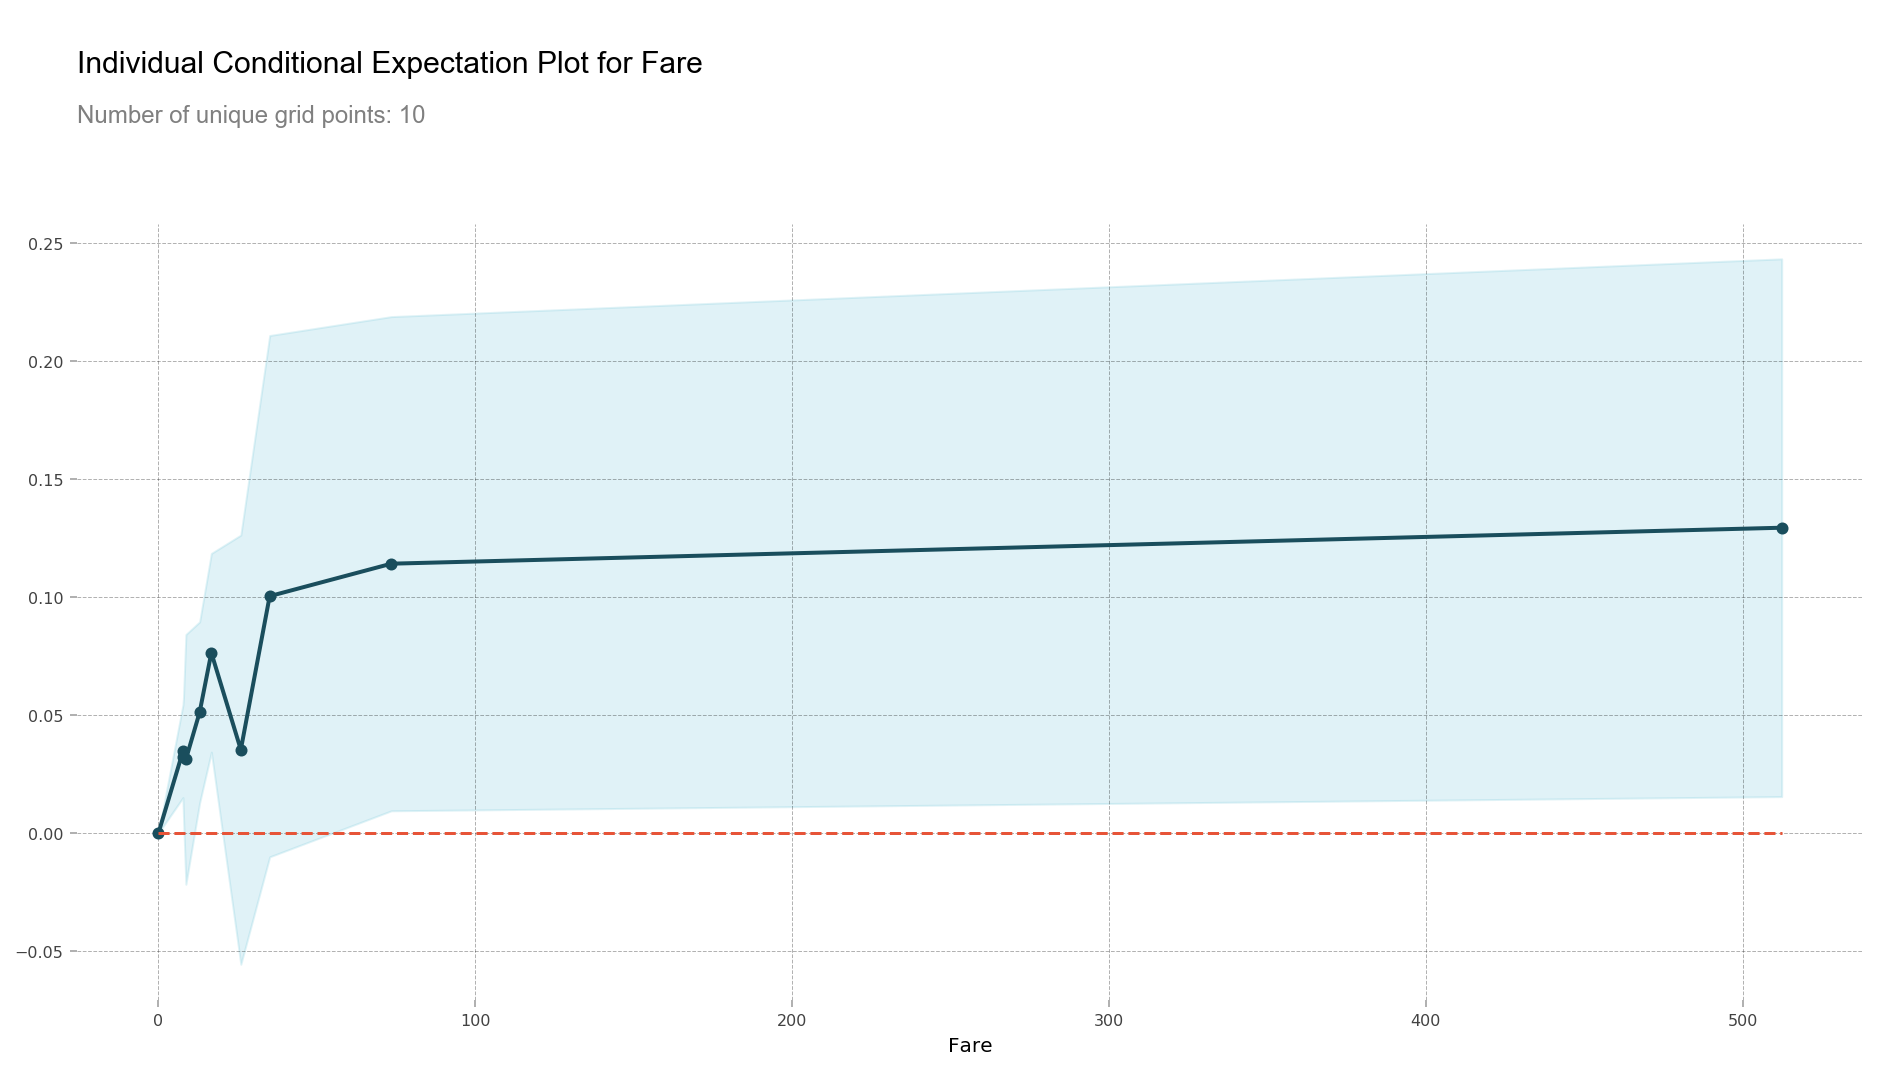

In [48]:
pd_explainer = PartialDependenceExplainer(estimator = clf)
results = pd_explainer.fit(data, feature = 'Fare')
plt.figure(figsize = (16, 9))
pd_explainer.plot(results)